In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 합성곱신경망 이미지 분류

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled.shape

(60000, 28, 28, 1)

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 생성

In [12]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) # 14X14 특성맵 = 32 개 생성
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2)) # 7X7 특성맵 = 64 개 생성

In [14]:
model.add(keras.layers.Flatten()) # 7X7X64 = 3136
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4)) # 60개(60%) 노드만 통과해서 사용
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [ ]:
keras.utils.plot_model(model)

#### 모델 컴파일 훈련

In [19]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/best_cnn_model.h5",save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.5205 - accuracy: 0.8123
Epoch 1: val_loss improved from inf to 0.31751, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.5201 - accuracy: 0.8124 - val_loss: 0.3175 - val_accuracy: 0.8812
Epoch 2/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.3458 - accuracy: 0.8744
Epoch 2: val_loss improved from 0.31751 to 0.28160, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.3457 - accuracy: 0.8744 - val_loss: 0.2816 - val_accuracy: 0.8963
Epoch 3/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.8927
Epoch 3: val_loss improved from 0.28160 to 0.27324, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2995 - accuracy: 0.8927 - val_loss: 0.2732 - val_accuracy: 0.8974
Epoch 4/20
1500/1500 [====

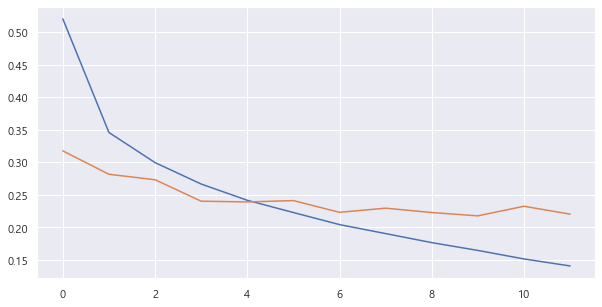

In [20]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [21]:
early_stopping_cb.stopped_epoch

11

In [22]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2178 - accuracy: 0.9217


[0.21778936684131622, 0.92166668176651]

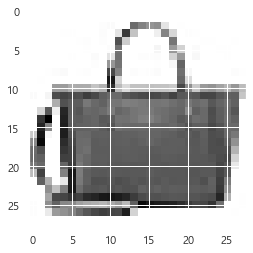

In [23]:
plt.imshow(X=val_scaled[0].reshape(28,28), cmap="gray_r")
plt.show()

In [24]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 185ms/step


array([[1.6150296e-18, 1.9416401e-21, 3.4601427e-23, 1.8924020e-17,
        1.1025436e-19, 4.8860591e-18, 9.5475036e-21, 3.3999810e-23,
        1.0000000e+00, 1.1397362e-18]], dtype=float32)

In [27]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels
# 8 : 가방

1/1 [==============================] - 0s 19ms/step


array([8], dtype=int64)

In [28]:
classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클부츠"]

In [30]:
print(classes[np.argmax(result)])

가방
